# Ensemble Models 
## 3. Advanced ensemble models - Boosting 

In [128]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [129]:
def classification_results(y, y_pred, name='', classes=['no', 'yes'], add_rep=False):
    acc = accuracy_score(y, y_pred)
                        
    cm = pd.DataFrame(confusion_matrix(y, y_pred), 
                      index=classes, 
                      columns=classes)

    print(name + ' accuracy: ', round(acc,4))
    print()
    print(cm)
    print()
    if (add_rep):
        print(name + ' Classification report: ')
        print(classification_report(y, y_pred))


In [130]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred, name=''):
    
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print(name )
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# Introduction

Ensemble models, combine the predictions of multiple models, to improve the overall performance. 

## Simple ensemble Methods

Simple ensemble learning methods use a group of existing models, and combine their predictions by voting or avareging. Advanced ensemble models, create a group of models on the given train data set, then combined their predictions in one of simple ensemble methods.


Recommended reading:
* https://towardsdatascience.com/simple-guide-for-ensemble-learning-methods-d87cc68705a2
* https://towardsdatascience.com/holy-grail-for-bias-variance-tradeoff-overfitting-underfitting-7fad64ab5d76


## Advanced ensemble methods

## Boosting
Boosting is an **iterative technique**, meaning we promote step by step, hopefully to to a better solution.  In each step, we build a model, that is based on a feedback of the previous model.

Boosting algorithms, show good predictive accuracy, the best from the models we saw so far. But with it comes high variance and the tendency to overfit.

### AdaBoost

AdaBoost method, fit a sequence of base models on repeatedly modified versions of the data. At each boosting iteration the samples that were misclassified in the previous iteration are given higher weights, while the correctly-classified samples are given lower weights.


It worth noting that since AdaBoost inherently follows problematic samples, it is relatively sensitive to noisy data and outliers.

### Gradient descent
Gradient descent is a known boosting method, that aims to diminish a given loss function iterativly. In Gradient descent, we step "down" the the loss function in the direction of the derivative. 

### Gradient Boosting 

Boosting technique, with decision tree as base model, and Gradient decent as boosting method.

Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. 

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


### XGBoost
XGBoost stands for eXtreme Gradient Boosting.
It is improved version of the Gradient Boosting. Few of the improvments are:
* Xgboost does regularization of the tree as well to avoid overfitting.
* Xgboost deals with the missing values efficiently.
* Xgboost uses optimization techniques to yield superior results using less computing resources in the shortest amount of time.

Following link to learn xgboost:
* https://www.youtube.com/watch?v=Vly8xGnNiWs

## Scikit-learn AdaBoost

Scikit-learn AdaBoost class implements the AdaBoost method. The main arguments are:
* base_estimator - the weak learner used.
* n_estimators- the maximum number of iterations
* learning_rate - The 'size' of the correction in each iterative step, or the amount of impact of the former classifiers on the boosting process.


> AdaBoost relatively sensitive to noisy data and outliers,since it tries to improve performance by iteratively clinging to the mis-classified samples.

#### AdaBoost example with digits dataset

In [131]:
from sklearn import datasets

data = datasets.load_digits()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                        random_state=0)

clf_base = DecisionTreeClassifier(max_depth=3)

clf_adaboost = AdaBoostClassifier(base_estimator=clf_base,
                                  n_estimators=200,
                                  learning_rate=0.01)
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=200, random_state=None)

In [132]:
classification_results(y_train, clf_adaboost.predict(X_train), name='AdaBoost train', 
                       classes=data.target_names, add_rep=True)

AdaBoost train accuracy:  0.936

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  103    0    1    0    0    0    0   33   10
2    0    0  128    3    0    0    0    0    9    1
3    0    0    0  129    0    1    0    1    4   19
4    0    0    0    0  148    0    3    0    0    0
5    0    0    0    0    0  141    0    0    0    1
6    0    0    0    0    0    0  136    0    1    0
7    0    0    0    0    0    0    0  136    4    0
8    0    0    0    0    0    0    0    0  135    0
9    0    0    0    0    0    0    0    1    0  138

AdaBoost train Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      0.70      0.82       147
           2       1.00      0.91      0.95       141
           3       0.97      0.84      0.90       154
           4       1.00      0.98      0.99       151
           5       0.99      0

In [133]:
classification_results(y_test, clf_adaboost.predict(X_test), name='AdaBoost test', 
                       classes=data.target_names, add_rep=True)

AdaBoost test accuracy:  0.8917

    0   1   2   3   4   5   6   7   8   9
0  25   0   0   1   0   1   0   0   0   0
1   0  25   0   1   0   0   0   0   6   3
2   0   1  25   5   0   0   0   0   5   0
3   0   0   0  26   0   0   0   0   1   2
4   0   1   0   0  29   0   0   0   0   0
5   0   0   0   0   1  36   0   0   0   3
6   0   0   0   1   0   0  42   0   1   0
7   0   0   0   0   0   0   0  38   1   0
8   0   1   0   1   0   0   0   0  37   0
9   0   0   0   2   0   1   0   0   0  38

AdaBoost test Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.89      0.71      0.79        35
           2       1.00      0.69      0.82        36
           3       0.70      0.90      0.79        29
           4       0.97      0.97      0.97        30
           5       0.95      0.90      0.92        40
           6       1.00      0.95      0.98        44
           7       1.00      0.97

In [134]:
clf_base = LogisticRegression()

clf_adaboost = AdaBoostClassifier(base_estimator=clf_base,
                                  n_estimators=200,
                                  learning_rate=0.01)
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.01, n_estimators=200, random_state=None)

In [135]:
classification_results(y_train, clf_adaboost.predict(X_train), name='AdaBoost train', 
                       classes=data.target_names)

AdaBoost train accuracy:  0.9763

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  139    1    0    1    0    0    0    4    2
2    0    1  140    0    0    0    0    0    0    0
3    0    0    0  151    0    0    0    0    2    1
4    0    1    0    0  147    0    0    0    3    0
5    0    0    0    0    0  138    1    0    0    3
6    0    2    0    0    1    0  133    0    1    0
7    0    0    0    0    0    0    0  138    1    1
8    0    3    0    0    0    0    0    0  132    0
9    0    0    0    1    0    1    0    0    3  134



In [136]:
classification_results(y_test, clf_adaboost.predict(X_test), name='AdaBoost test', 
                       classes=data.target_names)

AdaBoost test accuracy:  0.9611

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  31   0   0   0   0   1   0   1   2
2   0   0  34   0   0   0   0   1   1   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   0   0   0   0  39   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   0   0   0   2   0   0  37   0   0
8   0   1   1   0   0   0   0   0  37   0
9   0   0   0   0   0   1   0   0   0  40



### AdaBoost regression example with Boston data
In the following example, we compare Decision tree regressor to AdaBoost regressor that is based on this decision tree.

In [137]:
data = datasets.load_boston()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                        random_state=0)

In [138]:
base_dt = DecisionTreeRegressor(max_depth=3)
base_dt.fit(X_train, y_train)
regression_results(y_train, base_dt.predict(X_train),'Decision Tree train')
print()
regression_results(y_test, base_dt.predict(X_test),'Decision Tree test')

Decision Tree train
explained_variance:  0.8291
r2:  0.8291
MAE:  2.739
MSE:  14.5504
RMSE:  3.8145

Decision Tree test
explained_variance:  0.5937
r2:  0.5897
MAE:  3.5791
MSE:  33.4113
RMSE:  5.7802


In [139]:
base_dt = DecisionTreeRegressor(max_depth=3)

adaboost = AdaBoostRegressor(base_estimator=base_dt,
                                  n_estimators=200,
                                  learning_rate=0.01)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.01, loss='linear', n_estimators=200,
         random_state=None)

In [140]:
regression_results(y_train, adaboost.predict(X_train),'AdaBoost with Decision Tree train')

AdaBoost with Decision Tree train
explained_variance:  0.9017
r2:  0.9016
MAE:  2.2495
MSE:  8.3792
RMSE:  2.8947


In [141]:
regression_results(y_test, adaboost.predict(X_test),'AdaBoost with Decision Tree test')

AdaBoost with Decision Tree test
explained_variance:  0.676
r2:  0.6758
MAE:  3.2333
MSE:  26.3965
RMSE:  5.1378


#### AdaBoost regressor with Linear regression as base model

In [142]:
from sklearn.linear_model import LinearRegression
base_lr = LinearRegression()
base_lr.fit(X_train, y_train)
regression_results(y_train, base_lr.predict(X_train),'LinearRegression train')
print()
regression_results(y_test, base_lr.predict(X_test),'LinearRegression test')

LinearRegression train
explained_variance:  0.773
r2:  0.773
MAE:  3.1032
MSE:  19.3265
RMSE:  4.3962

LinearRegression test
explained_variance:  0.5901
r2:  0.5892
MAE:  3.8429
MSE:  33.449
RMSE:  5.7835


In [143]:
adaboost = AdaBoostRegressor(base_estimator=base_lr,
                                  n_estimators=200,
                                  learning_rate=0.01)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=0.01, loss='linear', n_estimators=200,
         random_state=None)

In [144]:
regression_results(y_train, adaboost.predict(X_train),'AdaBoostRegressor train')

AdaBoostRegressor train
explained_variance:  0.7694
r2:  0.7677
MAE:  3.2944
MSE:  19.7783
RMSE:  4.4473


In [145]:
regression_results(y_test, adaboost.predict(X_test),'AdaBoostRegressor test')

AdaBoostRegressor test
explained_variance:  0.6085
r2:  0.6076
MAE:  4.0311
MSE:  31.9549
RMSE:  5.6529


## Scikit-learn Gradient boosting - Minimizing  loss function
the _GradientBoostingClassifier_ classifier works only with decision trees. so the model hyperparameters are given directly to the _GradientBoostingClassifier_.

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 




> **NOTE:** The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

### Lets run boston regression with Gradient boosting

In [147]:
clf_GB = GradientBoostingRegressor(max_depth=3,
                                    n_estimators=200,
                                    learning_rate=0.01, verbose=1)
clf_GB.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1          83.7389            0.30s
         2          82.3620            0.25s
         3          81.0126            0.26s
         4          79.6898            0.24s
         5          78.3931            0.25s
         6          77.1220            0.24s
         7          75.8760            0.23s
         8          74.6545            0.23s
         9          73.4572            0.22s
        10          72.2833            0.23s
        20          61.5180            0.19s
        30          52.5704            0.17s
        40          45.1687            0.15s
        50          38.9493            0.13s
        60          33.7540            0.12s
        70          29.3597            0.11s
        80          25.6254            0.10s
        90          22.4616            0.09s
       100          19.8130            0.08s
       200           7.6619            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

In [148]:
regression_results(y_train, clf_GB.predict(X_train),'GradientBoostingRegressor train')
print()
regression_results(y_test, clf_GB.predict(X_test),'GradientBoostingRegressor test')

GradientBoostingRegressor train
explained_variance:  0.91
r2:  0.91
MAE:  2.1631
MSE:  7.6619
RMSE:  2.768

GradientBoostingRegressor test
explained_variance:  0.7518
r2:  0.7518
MAE:  3.1145
MSE:  20.2105
RMSE:  4.4956


### Classification example with Gradient boosting

In [149]:
data = datasets.load_digits()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                        random_state=0)


In [150]:
clf_GB = GradientBoostingClassifier(max_depth=3,
                                    n_estimators=200,
                                    learning_rate=0.01, verbose=1)
clf_GB.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        3215.6313           11.55s
         2        3129.8617           11.59s
         3        3050.1777           10.36s
         4        2975.8496            9.82s
         5        2906.0649            9.77s
         6        2840.5348            9.66s
         7        2778.5467            9.33s
         8        2719.7466            9.07s
         9        2663.9756            8.87s
        10        2610.4905            8.69s
        20        2178.1802            7.85s
        30        1861.2350            7.47s
        40        1613.7877            7.14s
        50        1415.8463            6.63s
        60        1249.0973            6.13s
        70        1107.8564            5.68s
        80         987.0129            5.22s
        90         882.8483            4.77s
       100         791.2592            4.32s
       200         283.9247            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [152]:
classification_results(y_train, clf_GB.predict(X_train), name='GradientBoostingClassifier train', 
                       classes=data.target_names)

GradientBoostingClassifier train accuracy:  0.9861

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  146    0    1    0    0    0    0    0    0
2    0    0  141    0    0    0    0    0    0    0
3    0    1    0  149    0    2    0    1    1    0
4    0    0    0    0  149    0    0    1    1    0
5    0    0    0    0    0  141    0    0    0    1
6    0    0    0    0    0    0  136    0    1    0
7    0    0    0    1    0    0    0  137    0    2
8    0    2    0    0    0    0    0    0  132    1
9    0    0    0    1    0    0    0    1    2  135



In [153]:
classification_results(y_test, clf_GB.predict(X_test), name='GradientBoostingClassifier test', 
                       classes=data.target_names)

GradientBoostingClassifier test accuracy:  0.9333

    0   1   2   3   4   5   6   7   8   9
0  26   0   0   0   0   1   0   0   0   0
1   0  32   0   1   0   0   0   0   0   2
2   1   0  32   1   0   0   1   1   0   0
3   0   0   0  28   0   0   0   0   0   1
4   1   0   0   0  28   0   0   1   0   0
5   0   1   0   0   0  38   0   0   0   1
6   0   0   0   1   1   0  42   0   0   0
7   0   0   0   0   1   0   0  38   0   0
8   0   2   0   2   0   0   0   0  35   0
9   1   0   0   1   0   1   0   0   1  37



## Learning Rate is importent

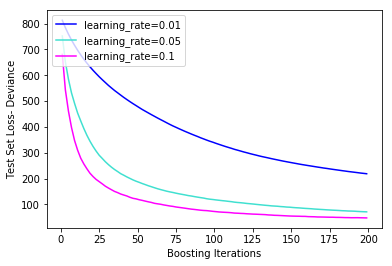

In [156]:
original_params = {'n_estimators': 200, 'max_leaf_nodes': 3, 
                   'max_depth': 4, 'random_state': 2,
                   'min_samples_split': 5}

plt.figure()
lr=0.01

for label, color, setting in [('learning_rate=0.01',
                               'blue',
                               {'learning_rate': 0.01}),
                              ('learning_rate=0.05', 
                               'turquoise',
                               {'learning_rate': 0.05}), 
                              ('learning_rate=0.1',
                               'magenta',
                               {'learning_rate': 0.1})]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::2], 
             test_deviance[::2],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Loss- Deviance')

plt.show()

In [157]:
clf_GB = GradientBoostingClassifier(max_depth=4,
                                    n_estimators=200,
                                    learning_rate=0.1, 
                                    subsample=0.5,verbose=1)
clf_GB.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        1130.1151         434.8089           11.75s
         2         919.9990         215.3436           12.67s
         3         759.4727         141.7806           11.76s
         4         629.2751         106.1392           11.69s
         5         543.0480          82.3469           11.84s
         6         462.0181          67.6475           11.47s
         7         399.5957          54.0565           11.15s
         8         355.1790          50.0597           10.87s
         9         304.8483          37.0921           11.11s
        10         271.8585          33.3579           11.14s
        20          86.4413           6.9737           10.25s
        30          31.6416           1.5343            9.61s
        40          13.3038           0.4448            8.91s
        50           6.6474           0.3513            8.35s
        60           3.3100           0.0925            7.62s
       

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [159]:
classification_results(y_train, clf_GB.predict(X_train), name='GradientBoostingClassifier train', 
                       classes=data.target_names)
classification_results(y_test, clf_GB.predict(X_test), name='GradientBoostingClassifier test', 
                       classes=data.target_names)

GradientBoostingClassifier train accuracy:  1.0

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  147    0    0    0    0    0    0    0    0
2    0    0  141    0    0    0    0    0    0    0
3    0    0    0  154    0    0    0    0    0    0
4    0    0    0    0  151    0    0    0    0    0
5    0    0    0    0    0  142    0    0    0    0
6    0    0    0    0    0    0  137    0    0    0
7    0    0    0    0    0    0    0  140    0    0
8    0    0    0    0    0    0    0    0  135    0
9    0    0    0    0    0    0    0    0    0  139

GradientBoostingClassifier test accuracy:  0.9694

    0   1   2   3   4   5   6   7   8   9
0  26   0   0   0   0   1   0   0   0   0
1   0  34   0   0   1   0   0   0   0   0
2   1   0  35   0   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   0   0   1   0  39   0   0   0   0
6   0   0   1   0   0   0  42   0

# XGBoost
to install on windows: 
`conda install -c anaconda py-xgboost ` 

Example's of regression and classification:
* https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn

In [166]:
data = datasets.load_digits()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                        random_state=0)


In [168]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

In [184]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth=4,
                                    n_estimators=200,
                                    learning_rate=0.1, 
                                    subsample=0.5,verbose=1)


xgb_model.fit(X_train, y_train, verbose=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5, verbose=1)

In [185]:
classification_results(y_train, xgb_model.predict(X_train), name='XGBClassifier train', 
                       classes=data.target_names)
classification_results(y_test, xgb_model.predict(X_test), name='XGBClassifier test', 
                       classes=data.target_names)

XGBClassifier train accuracy:  1.0

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  147    0    0    0    0    0    0    0    0
2    0    0  141    0    0    0    0    0    0    0
3    0    0    0  154    0    0    0    0    0    0
4    0    0    0    0  151    0    0    0    0    0
5    0    0    0    0    0  142    0    0    0    0
6    0    0    0    0    0    0  137    0    0    0
7    0    0    0    0    0    0    0  140    0    0
8    0    0    0    0    0    0    0    0  135    0
9    0    0    0    0    0    0    0    0    0  139

XGBClassifier test accuracy:  0.9667

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  33   0   0   1   0   0   0   0   1
2   1   0  35   0   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   0   0   0   0  38   0   0   0   2
6   0   1   0   0   0   0  43   0   0   0
7   0   0   0   0